In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def load_data(file_path: str) -> pd.DataFrame:
    data = pd.read_csv(file_path, index_col=0)
    return data

In [20]:
raw_data = load_data('data/raw/BIT_AI_assignment_data.csv')
raw_data = raw_data.drop(columns=['Machine ID', 'Sales ID'])
print(raw_data.shape)

/var/folders/pj/kpd4vj4j6_b_l77b3ry75hp40000gn/T/ipykernel_42572/1564244761.py:2: DtypeWarning: Columns (14,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, index_col=0)


(412698, 51)


In [21]:
print(raw_data.head())

   Sales Price  Model ID  datasource  Auctioneer ID  Year Made  \
0      66000.0      3157         121            3.0       2004   
1      57000.0        77         121            3.0       1996   
2      10000.0      7009         121            3.0       2001   
3      38500.0       332         121            3.0       2001   
4      11000.0     17311         121            3.0       2007   

   MachineHours CurrentMeter Usage Band       Sales date Model Description  \
0                       68.0        Low  11/16/2006 0:00              521D   
1                     4640.0        Low   3/26/2004 0:00            950FII   
2                     2838.0       High   2/26/2004 0:00               226   
3                     3486.0       High   5/19/2011 0:00          PC120-6E   
4                      722.0     Medium   7/23/2009 0:00              S175   

  Base Model  ... Screen Size.1 Stick Length Thumb Pattern Changer  \
0        521  ...           NaN          NaN   NaN             N

In [22]:
print("Variable names:", raw_data.columns.tolist())

Variable names: ['Sales Price', 'Model ID', 'datasource', 'Auctioneer ID', 'Year Made', 'MachineHours CurrentMeter', 'Usage Band', 'Sales date', 'Model Description', 'Base Model', 'Secondary Description', 'Model Series', 'Model Descriptor', 'Machine Size', 'Product Class Description', 'State of Usage', 'Product Group', 'Product Group Description', 'Driver System', 'Enclosure', 'Control', 'Touchpad Type', 'Control Type', 'Version', 'Transmission', 'Turbo Charged', 'Extra features', 'Machine Width', 'Clean Room', 'Engine Horsepower', 'Hydraulics', 'Push Block', 'Ripper', 'Scarifier', 'Tip Control', 'Screen Size', 'Coupler', 'Couple System', 'Grouser Tracks', 'Hydraulics Flow', 'Tupper Type', 'Screen Size.1', 'Stick Length', 'Thumb', 'Pattern Changer', 'Grouser Type', 'Backhoe Mounting', 'Blade Type', 'Travel Possibilities', 'Differential Type', 'Steering Controls']


In [23]:
total_missing_values = raw_data.isnull().sum().sum()
print("Total missing values in dataset (%):", total_missing_values / (raw_data.shape[0] * raw_data.shape[1]))
print("Number of columns with missing values:", raw_data.isnull().any().sum())
print("Names of columns without missing values:", raw_data.columns[raw_data.isnull().sum() == 0].tolist())
null_values_percentages = raw_data.isnull().sum()/412698 
null_values_nonzero = null_values_percentages[null_values_percentages > 0]
print("Missing values per column (ranked) (%):\n", null_values_nonzero.sort_values(ascending=False))

Total missing values in dataset (%): 0.5662276046891431
Number of columns with missing values: 40
Names of columns without missing values: ['Sales Price', 'Model ID', 'datasource', 'Year Made', 'Sales date', 'Model Description', 'Base Model', 'Product Class Description', 'State of Usage', 'Product Group', 'Product Group Description']
Missing values per column (ranked) (%):
 Push Block                   0.937041
Extra features               0.937041
Tip Control                  0.937041
Engine Horsepower            0.937041
Clean Room                   0.937041
Machine Width                0.937041
Scarifier                    0.937014
Hydraulics Flow              0.891264
Grouser Tracks               0.891264
Couple System                0.891024
Model Series                 0.857845
Steering Controls            0.826697
Differential Type            0.826595
Usage Band                   0.821492
Model Descriptor             0.818715
Backhoe Mounting             0.804428
Version        

In [24]:
categorical = raw_data.select_dtypes(include=['object']).shape[1]
numerical = raw_data.select_dtypes(include=[np.number]).shape[1]
print("Number of categorial variables:", categorical)
print("Number of numerical variables:", numerical)
print("Rest", raw_data.shape[1] - categorical - numerical)

Number of categorial variables: 45
Number of numerical variables: 6
Rest 0


In [25]:
# Compute statistics per variable
stats = raw_data.describe().T
print(stats)

                              count          mean           std     min  \
Sales Price                412698.0  31215.181414  23141.743695  4750.0   
Model ID                   412698.0   6947.201828   6280.824982    28.0   
datasource                 412698.0    135.169361      9.646749   121.0   
Auctioneer ID              392562.0      6.585268     17.158409     0.0   
Year Made                  412698.0   1899.049637    292.190243  1000.0   
MachineHours CurrentMeter  147504.0   3522.988285  27169.928650     0.0   

                               25%      50%      75%        max  
Sales Price                14500.0  24000.0  40000.0   142000.0  
Model ID                    3261.0   4605.0   8899.0    37198.0  
datasource                   132.0    132.0    136.0      173.0  
Auctioneer ID                  1.0      2.0      4.0       99.0  
Year Made                   1985.0   1995.0   2001.0     2014.0  
MachineHours CurrentMeter      0.0      0.0   3209.0  2483300.0  


In [26]:
to_remove_std = stats[stats['std'] == 0].index.tolist()
print("Variables with zero standard deviation (to remove):", to_remove_std)


nunique_counts = raw_data.nunique()
to_remove_unique = nunique_counts[nunique_counts == 1].index.tolist()
print("Variables with a single unique value (to remove):", to_remove_unique)
print("Variables with unique values count:\n", nunique_counts.sort_values())

# based on the frequencies, remove both IDs:
# to_remove_unique += ['Machine ID', 'Sales ID'] (removed above)

to_remove = list(set(to_remove_std + to_remove_unique))
print("Total columns to consider removing:", to_remove)

Variables with zero standard deviation (to remove): []
Variables with a single unique value (to remove): []
Variables with unique values count:
 Turbo Charged                    2
Control                          2
Extra features                   2
Engine Horsepower                2
Push Block                       2
Scarifier                        2
Couple System                    2
Grouser Tracks                   2
Version                          2
Tupper Type                      2
Backhoe Mounting                 2
Usage Band                       3
Coupler                          3
Control Type                     3
Thumb                            3
Pattern Changer                  3
Clean Room                       3
Grouser Type                     3
Hydraulics Flow                  3
Tip Control                      3
Ripper                           4
Driver System                    4
Differential Type                4
Touchpad Type                    4
Steering Contro

In [27]:
print(min(raw_data['Year Made']), max(raw_data['Year Made']))

1000 2014


Text(0, 0.5, 'Number of Vehicles')

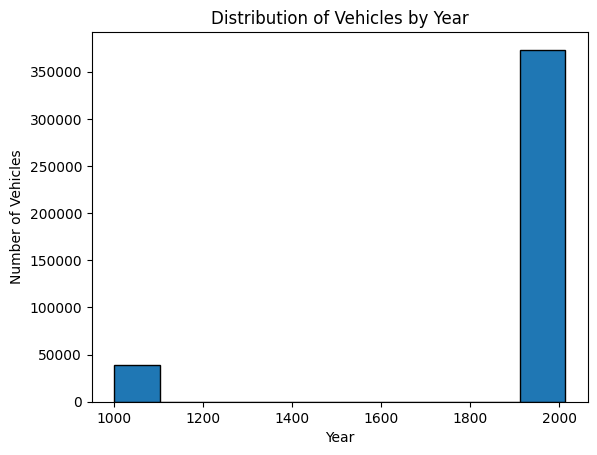

In [28]:
# make a histogram for years
plt.hist(raw_data['Year Made'], edgecolor='black')
plt.title('Distribution of Vehicles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')